### Audrey Gorter

# <b> Multiclass k-Nearest Neighbor (kNN) </b>

kNN is a simple algorithm that stores all available cases and classifies new cases based on a distance metric (e.g., Euclidean distance metric).

![Distance Formula](https://miro.medium.com/max/626/1*whWqafWqGnpM-_3SDEypPA.png)

## <span style='color: deeppink'> Part 1: </span> <span style='color: limegreen'> Dataset Information </span>

<b> The Iris Dataset: </b> The famous iris dataset was first published in 1936 by Ronald Fisher. The Iris Dataset contains 150 samples with the following four features (predictor values):

* sepal length
* sepal width
* petal length
* petal width

The variable to predict is the species which is one of the following three species of Iris:

* setosa (encoded as 0)
* versicolor (encoded as 1)
* virginica (encoded as 2)


https://archive.ics.uci.edu/dataset/53/iris

### <span style ='color: darkturquoise'> 1.1: </span> <span style= 'color: royalblue'> Import Libraries and The Dataset </span>

#### <span style= 'color: mediumorchid'> Import Libraries </span>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
# from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score 
from sklearn.metrics import f1_score, mean_absolute_error, roc_auc_score

#### <span style= 'color: mediumorchid'> Import the Dataset </span>

Encode the speices into an integer for machine learning.

In [3]:
col_names = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 
             'Species']
df = pd.read_csv('iris.csv', names= col_names, skiprows= 1)
label_encoder = LabelEncoder()
# Encode the 'Species' column
df['Species'] = label_encoder.fit_transform(df['Species'])
df.tail(3)



,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


### <span style ='color: darkturquoise'> 1.2: </span> <span style= 'color: royalblue'> Data Summary and Visualization </span>

#### <span style= 'color: mediumorchid'> Data Information </span>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal Width   150 non-null    float64
 2   Petal Length  150 non-null    float64
 3   Petal Width   150 non-null    float64
 4   Species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


#### <span style= 'color: mediumorchid'> Visualize the Whole Dataset </span>

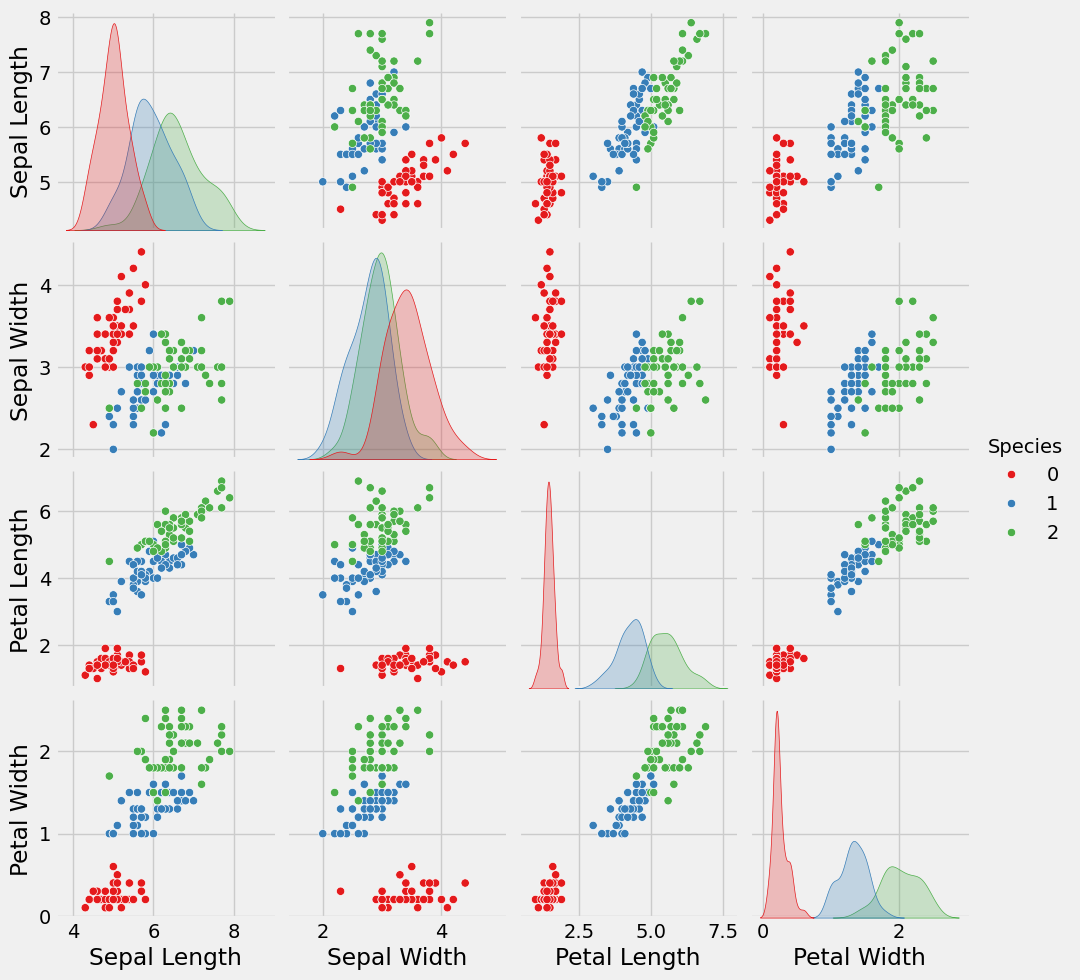

In [5]:
plt.style.use('fivethirtyeight')
sns.pairplot(df, hue= 'Species', palette= 'Set1')

#### <span style= 'color: mediumorchid'> Visualize the Label Class </span>

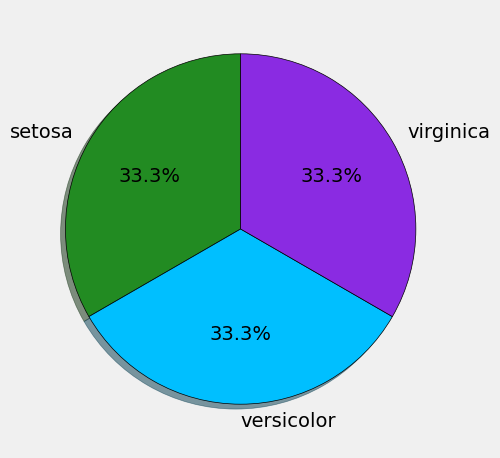

In [7]:
setosa = df[df['Species'] == 0].shape[0]
versicolor = df[df['Species'] == 1].shape[0]
virginica = df[df['Species'] == 2].shape[0]

label = [setosa, versicolor, virginica]
label_names = ['setosa', 'versicolor', 'virginica']
colors = ['forestgreen', 'deepskyblue', 'blueviolet']
plt.pie(label, labels= label_names, shadow= True,
         wedgeprops= {'edgecolor': 'black'}, autopct= '%1.1f%%', 
         startangle= 90, colors= colors)
plt.tight_layout()
plt.show()

## <span style='color: deeppink'> Part 2: </span> <span style='color: limegreen'> Data Preprocessing </span>

In this part, we did data preprocessing. Firstly, we define our predictor and target attribute. Then we check for missing values and determined none were found. Therefore we do not need to use the Simple Imputer from sklearn to apply the mean straegy to handle the missing values. After that we apply the most important part of data preprocessing, Feature Scaling. If we examine out dataset, then we see some attributes have information in numeric value. Some values are extremely high, and some are exceptionally low if we see sepal length, sepal width, petal length and petal width. This will cause issues in our machinery model. To solve that problem we set all values on the same scale. There are two methods to solve that problem and we used Standard Scaler. In the end, we split our data for training and testing. The ratio for training and testings is 0.8 and 0.2 respectively.

* Define predictor and target
* Dealing with missing values
* Feature scaling
* Split the data into training set and testing set


### <span style = 'color: darkturquoise'> 2.1: </span> <span style= 'color: royalblue'> Define Predictor and Target Attribute </span>

In [8]:
X = df.iloc[:, :-1].to_numpy()
Y = df.iloc[:, -1].to_numpy()

In [44]:
print('Predictor Attribute:\n', X)
print('\nTarget Attribute:\n', Y)

Predictor Attribute:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 ...
 [6.5 3.  5.2 2. ]
 [6.2 3.4 5.4 2.3]
 [5.9 3.  5.1 1.8]]

Target Attribute:
 [0 0 0 ... 2 2 2]


### <span style ='color: darkturquoise'> 2.2: </span> <span style= 'color: royalblue'> Dealing with Missing Values </span>

#### <span style= 'color: mediumorchid'> Check the Missing Values </span>

In [9]:
df.isnull().sum()

Sepal Length    0
Sepal Width     0
Petal Length    0
Petal Width     0
Species         0
dtype: int64

No missing values were found in the dataset. We do not need to apply mean strategy to handle the missing values. 

### <span style ='color: darkturquoise'> 2.3: </span> <span style= 'color: royalblue'> Feature Scaling </span>

In [10]:
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [46]:
X

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       ...,
       [ 0.79566902, -0.13197948,  0.8195957 ,  1.05393502],
       [ 0.4321654 ,  0.78880759,  0.93327055,  1.44883158],
       [ 0.06866179, -0.13197948,  0.76275827,  0.79067065]])

### <span style ='color: darkturquoise'> 2.4: </span> <span style= 'color: royalblue'> Split the Dataset into a Training Dataset and a Testing Dataset </span>

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, 
                                                    random_state = 0)

#### <span style= 'color: mediumorchid'> Training Dataset </span>

In [12]:
print("X_train", X_train.shape)
print("Y_train", y_train.shape)

X_train (120, 4)
Y_train (120,)


#### <span style= 'color: mediumorchid'> Testing Dataset </span>

In [13]:
print("X_test", X_test.shape)
print("X_test", y_test.shape)

X_test (30, 4)
X_test (30,)


## <span style='color: deeppink'> Part 3: </span> <span style='color: limegreen'> Build k-Nearest Neighbors </span>

In this part we build k-Nearest Neighbors from scratch and with scikit-learn.

### <span style ='color: darkturquoise'> 3.1: </span> <span style= 'color: royalblue'> Implementation from Scratch </span>

#### <span style= 'color: mediumorchid'> Build Model </span>

In [16]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

class KNN:
    def __init__(self, k= 3):
        self.k = k
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)
    
    def _predict(self, x):
        distances = [euclidean_distance(x, x_train)
                      for x_train in self.X_train]
        k_idx = np.argsort(distances)[: self.k]
        k_neighbor_labels = [self.y_train[i] for i in k_idx]
        most_common = Counter(k_neighbor_labels).most_common(1)
        return most_common[0][0]

#### <span style= 'color: mediumorchid'> Initialize the Model </span>

In [17]:
knn_scratch = KNN(k= 5)

#### <span style= 'color: mediumorchid'> Fit the Training Data into the Model </span>

In [18]:
knn_scratch.fit(X_train, y_train)

#### <span style= 'color: mediumorchid'> Predict the Test Data </span>

In [19]:
y_predict_scratch = knn_scratch.predict(X_test)
y_predict_scratch

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

#### <span style= 'color: mediumorchid'> Accuracy Score </span>

In [20]:
accuracy_scratch = accuracy_score(y_predict_scratch, y_test)
print('Accuracy Score: ', accuracy_scratch)

Accuracy Score:  1.0


### <span style ='color: darkturquoise'> 3.2: </span> <span style= 'color: royalblue'> Implementation with Scikit-Learn </span>

#### <span style= 'color: mediumorchid'> Import Model from Scikit-learn </span>

In [21]:
from sklearn.neighbors import KNeighborsClassifier

#### <span style= 'color: mediumorchid'> Initialize the Model </span>

In [22]:
knn_sklearn = KNeighborsClassifier(n_neighbors= 5, metric= 'minkowski',
                                    p= 2)

#### <span style= 'color: mediumorchid'> Fit the Training Data into the Model </span>

In [23]:
knn_sklearn.fit(X_train, y_train)

KNeighborsClassifier()

#### <span style= 'color: mediumorchid'> Predict the Test Data </sapn>

In [24]:
y_predict_sklearn = knn_sklearn.predict(X_test)
y_predict_sklearn

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

#### <span style= 'color: mediumorchid'> Accuracy Score </span>

In [25]:
accuracy_sklearn = accuracy_score(y_predict_sklearn, y_test)
print('Accuracy Score: ', accuracy_sklearn)

Accuracy Score:  1.0


### <span style ='color: darkturquoise'> 3.3: </span>  <span style= 'color: royalblue'> Comparison (Scratch vs Scikit-learn) </span>

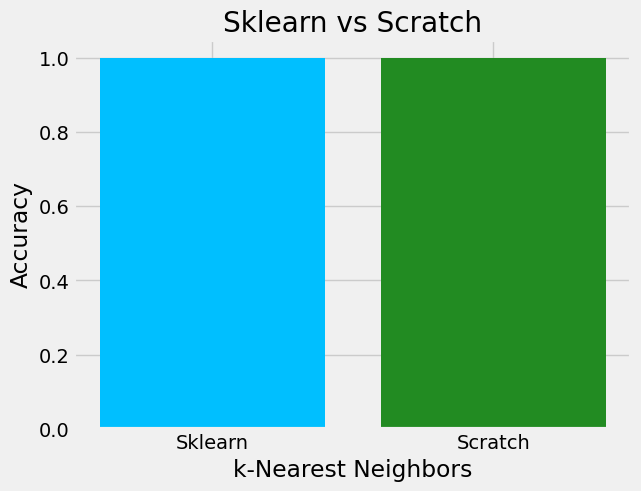

In [26]:
accuracy = [accuracy_sklearn, accuracy_scratch]
label = ['Sklearn', 'Scratch']
plt.bar(label, accuracy, color = ['deepskyblue', 'forestgreen'])
plt.title("Sklearn vs Scratch")
plt.xlabel("k-Nearest Neighbors")
plt.ylabel("Accuracy")
plt.show()

As we can see above, there is 100% accuracy from both implementations. 

## <span style='color: deeppink'>Part 4:</span> <span style='color: limegreen'> Evaluate the Results </span>

In this part we evaluate the k-Nearest Neighbors Scratch model (it doesn't matter because we got 100% result from both implementations). First we make a confusion matrix and we visualize. Then we calculate the following

* Accuracy
* Precision
* True Positive Rate (TPR)
* False Positive Rate (FPR)
* F-Score
* Specificity
* Error
* ROC Area

### <span style ='color: darkturquoise'> 4.1: </span> <span style= 'color: royalblue'> Confusion Matrix </span>

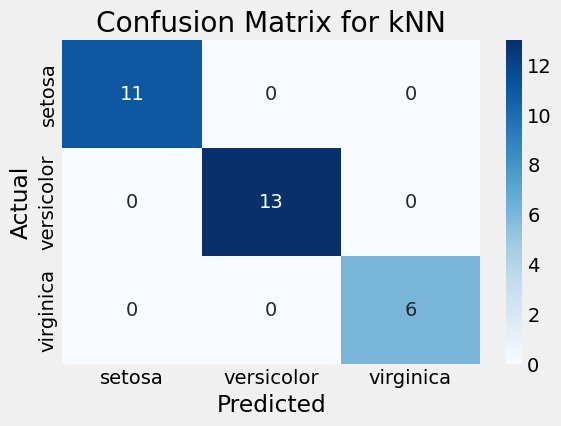

In [27]:
confusion_matrix_scratch = confusion_matrix(y_predict_scratch, y_test)
classes = ['setosa', 'versicolor', 'virginica']
cm_df = pd.DataFrame(confusion_matrix_scratch, index=classes, 
                     columns=classes)
plt.figure(figsize= (6, 4))
sns.heatmap(cm_df, annot=True, cmap='Blues')
plt.title('Confusion Matrix for kNN')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### <span style ='color: darkturquoise'> 4.2: </span> <span style= 'color: royalblue'> Evaluate the Results </span>

#### <span style= 'color: mediumorchid'> Calculate the Results </span>

In [34]:
# Calculate TP, FP, FN, TN for each class
tp = np.diag(confusion_matrix_scratch)
fp = confusion_matrix_scratch.sum(axis=0) - tp
fn = confusion_matrix_scratch.sum(axis=1) - tp
tn = confusion_matrix_scratch.sum() - (tp + fp + fn)

# Accuracy Score
accuracy = accuracy_score(y_predict_scratch, y_test)
print('Accuracy Score:', accuracy) 

# Precision Score
precision = precision_score(y_predict_scratch, y_test, average= 'macro')
print('Precision Score:', precision)  

# True positive Rate (TPR) or Sensitivity or Recall
tpr = recall_score(y_predict_scratch, y_test, average= 'macro')
print('True Positive Rate:', tpr)

# False positive Rate (FPR)
fpr = fp / (tn + fp)
macro_fpr = np.mean(fpr)
print('False Positive Rate: ', macro_fpr)

# F1 Score or F-Measure or F-Score
f1 = f1_score(y_predict_scratch, y_test, average= 'macro')
print('F1 Score:', f1) 

# Specificity
specificity = tn / (tn + fp)
macro_specificity = np.mean(specificity)
print('Specificity: ', macro_specificity)

# Mean Absolute Error
error = mean_absolute_error(y_predict_scratch, y_test)
print('Mean Absolute Error:', error)   

# ROC Area
y_prob = knn_sklearn.predict_proba(X_test)
roc = roc_auc_score (y_test, y_prob, multi_class= 'ovr', average= 'macro')
print('ROC Area', roc)


[11 13  6]
[0 0 0]
[19 17 24]
[0 0 0]
Accuracy Score: 1.0
Precision Score: 1.0
True Positive Rate: 1.0
False Positive Rate:  0.0
F1 Score: 1.0
Specificity:  1.0
Mean Absolute Error: 0.0
ROC Area 1.0


#### <span style= 'color: mediumorchid'> Visualize the Results </span>

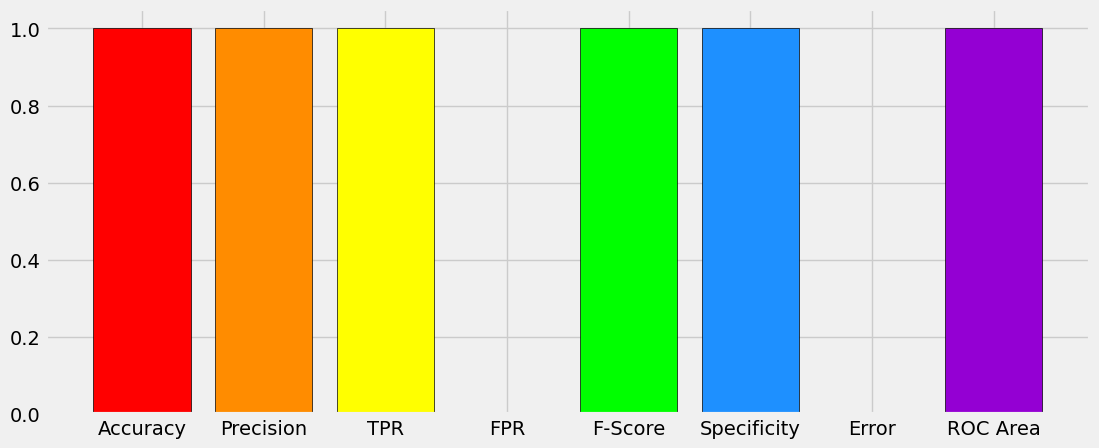

In [78]:
plt.figure(figsize= (12, 5))

results = [accuracy, precision, tpr, macro_fpr, f1, macro_specificity, 
           error, roc]
labels = ['Accuracy', 'Precision', 'TPR', 'FPR', 'F-Score', 'Specificity', 
          'Error', 'ROC Area']
colors = ['red', 'darkorange', 'yellow', 'greenyellow', 'lime', 
          'dodgerblue', 'blue', 'darkviolet']

plt.bar(labels, results, color= colors, edgecolor= 'black')
plt.show()

## <span style='color: deeppink'>Part 5:</span> <span style='color: limegreen'> Making a Single Prediction </span>

In this part we make a single predicition based on a new observation.

In [30]:
col = ['Sepal Length', 'Sepal Width', 'Petal Length', 
       'Petal Width', 'Species']
pd.DataFrame([[6.3, 3.3, 4.7, 1.6, '?']], columns= col)

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,6.3,3.3,4.7,1.6,?


In [29]:
new_prediction = knn_scratch.predict(sc_X.transform(
    np.array([[6.3, 3.3, 4.7, 1.6]])))

In [31]:
if new_prediction == 0:
    print('setosa')
elif new_prediction == 1:
    print('versicolor')
else:
    print('virginica')

versicolor
